In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# GPU / MEM

In [136]:
folder = 'tensorrt'
file = 'gpu_mem'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')[0:300]
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')[0:300]
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')[0:300]
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')[0:300]
# rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

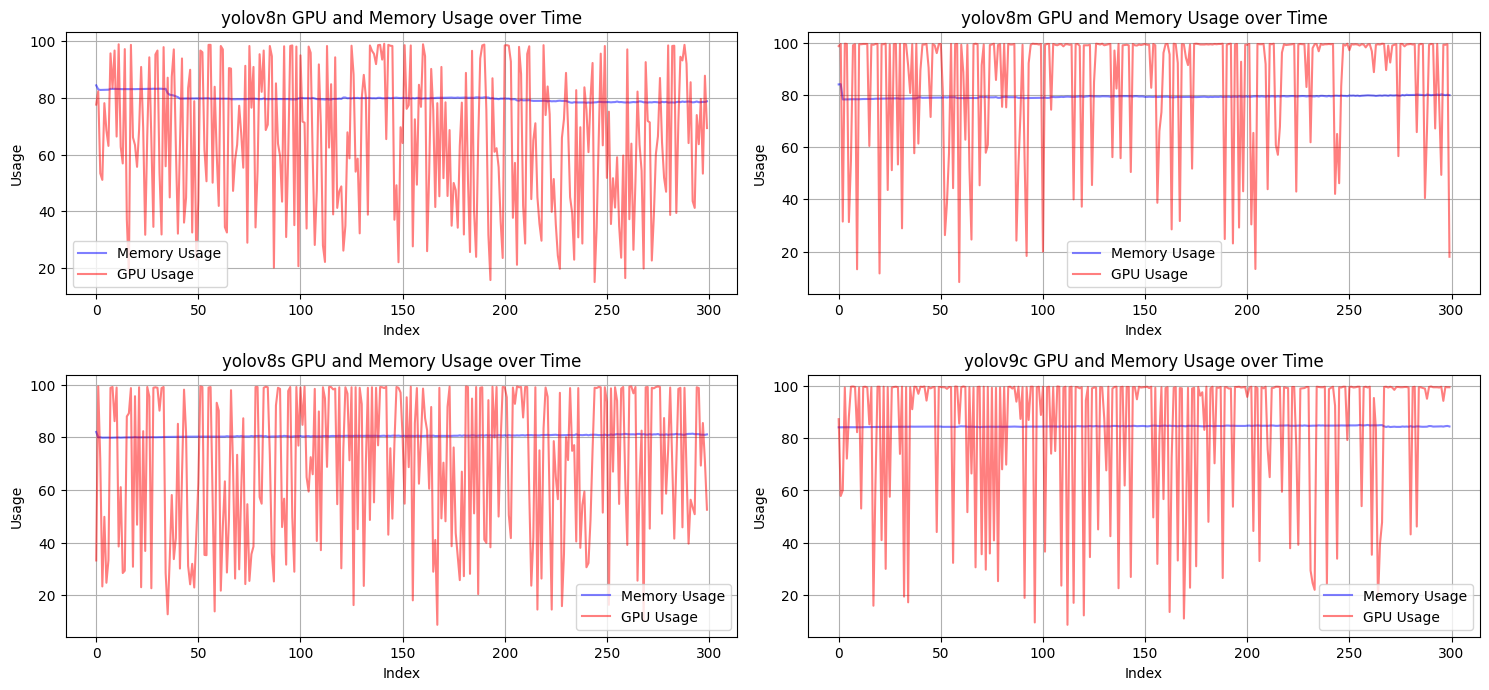

In [137]:

models = [yolov8n, yolov8m, yolov8s, yolov9c]
model_names = ['yolov8n', 'yolov8m', 'yolov8s', 'yolov9c']
# Plot GPU usage and memory usage for each model in subplots
plt.figure(figsize=(15, 10))
for i, model in enumerate(models, 1):
    plt.subplot(3, 2, i)
    plt.plot(model.index, model['mem_usage'], color='blue', label='Memory Usage', alpha=0.5)
    plt.plot(model.index, model['gpu_usage'], color='red', label='GPU Usage', alpha=0.5)
    plt.title(f'{model_names[i-1]} GPU and Memory Usage over Time')
    plt.xlabel('Index')
    plt.ylabel('Usage')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [138]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='number', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='number') \
                     .merge(yolov9c, on='number', suffixes=('_yolov8s', '_yolov9c'))
                    #  .merge(rtdetrl, on='number', suffixes=('_yolov8s', '_rtdetrl'))
# merged_data['gpu_usage_rtdetrl'] = merged_data['gpu_usage']
# merged_data['mem_usage_rtdetrl'] = merged_data['mem_usage']
merged_data = merged_data.drop(['number'], axis=1).copy()
merged_data = merged_data[0:300]

In [139]:
selected_columns = merged_data.filter(regex='^gpu_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
gpu_usage_yolov8n,300.0,65.640333,25.221311,15.0,44.200,66.05,91.0,99.2
gpu_usage_yolov8m,300.0,86.507667,23.435056,8.3,84.575,99.35,99.5,99.7
gpu_usage_yolov8s,300.0,70.014000,28.417536,8.7,44.725,75.85,98.9,99.4
gpu_usage_yolov9c,300.0,84.419000,26.434884,8.6,80.125,99.40,99.6,99.8


In [140]:
selected_columns = merged_data.filter(regex='^mem_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mem_usage_yolov8n,300.0,79.913146,1.347720,78.348604,78.994965,79.786383,80.071294,84.502439
mem_usage_yolov8m,300.0,79.358014,0.574066,78.339430,79.039984,79.368486,79.578273,84.188105
mem_usage_yolov8s,300.0,80.643364,0.360749,79.894376,80.378773,80.616437,80.891807,82.096863
mem_usage_yolov9c,300.0,84.575858,0.204562,84.174266,84.410330,84.551351,84.744821,85.086337


# FPS

In [141]:
file = 'fps'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')
# rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

In [142]:
yolov9c

,no,fps
0,1,7.122184
1,2,7.116046
2,3,8.265029
3,4,8.752265
4,5,8.659047
...,...,...
371,372,6.413083
372,373,8.093737
373,374,4.573602
374,375,5.077450


In [143]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='no', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='no') \
                     .merge(yolov9c, on='no', suffixes=('_yolov8s', '_yolov9c'))
                    #  .merge(rtdetrl, on='no', suffixes=('_yolov8s', '_rtdetrl'))
# merged_data['fps_rtdetrl'] = merged_data['fps']
merged_data = merged_data.drop(['no'], axis=1).copy()
merged_data = merged_data[0:300]

In [144]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_yolov8n,300.0,23.140880,2.998965,11.926139,21.181965,23.757975,25.373353,30.467468
fps_yolov8m,300.0,10.099494,0.768895,4.271072,9.777383,10.304694,10.621389,11.167568
fps_yolov8s,300.0,17.184665,1.721434,11.664421,16.282362,17.698683,18.474547,19.831881
fps_yolov9c,300.0,8.283795,0.516483,5.755833,8.087940,8.446432,8.637569,9.042683


In [145]:
# # Specify the file path for the Excel file
# excel_file_path = 'merged_data_describe.xlsx'

# # Export the DataFrame to Excel
# merged_data_describe.to_excel(excel_file_path)

In [146]:
merged_data.mean(axis=0)

fps_yolov8n    23.140880
fps_yolov8m    10.099494
fps_yolov8s    17.184665
fps_yolov9c     8.283795
dtype: float64

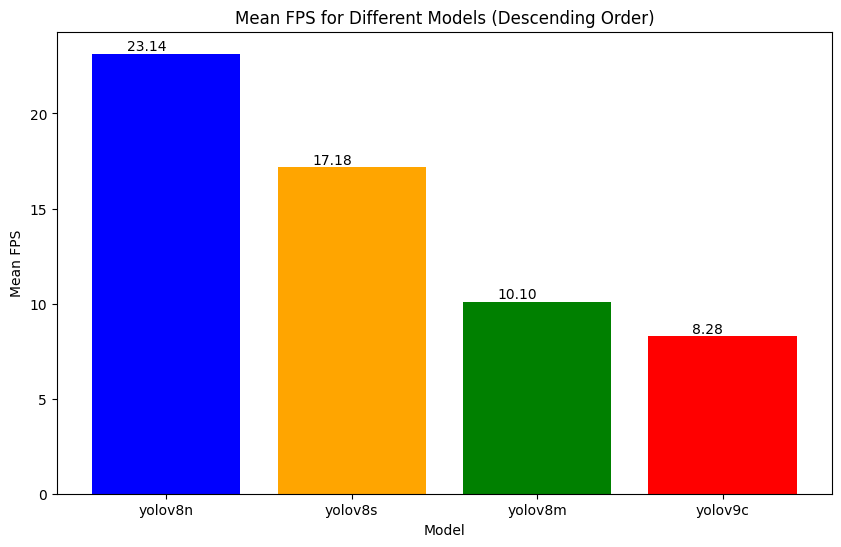

In [147]:
mean_fps = {
    'yolov8n': merged_data['fps_yolov8n'].mean(),
    'yolov8m': merged_data['fps_yolov8m'].mean(),
    'yolov8s': merged_data['fps_yolov8s'].mean(),
    'yolov9c': merged_data['fps_yolov9c'].mean(),
    # 'rtdetrl': merged_data['fps_rtdetrl'].mean()
}

# Sort mean FPS values in descending order
sorted_mean_fps = dict(sorted(mean_fps.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_mean_fps.keys(), sorted_mean_fps.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Mean FPS for Different Models (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Mean FPS')
for xi, yi in zip(sorted_mean_fps.keys(), sorted_mean_fps.values()):
    plt.text(xi, yi, f'{yi:.2f}', ha='right', va='bottom')
plt.show()

# Latency

In [148]:
file = 'latency'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt_tensorrt.csv', header=None)
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt_tensorrt.csv', header=None)
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt_tensorrt.csv', header=None)
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt_tensorrt.csv', header=None)
# rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv', header=None)

In [149]:
yolov9c.iloc[0, 0]

789.9631667137146

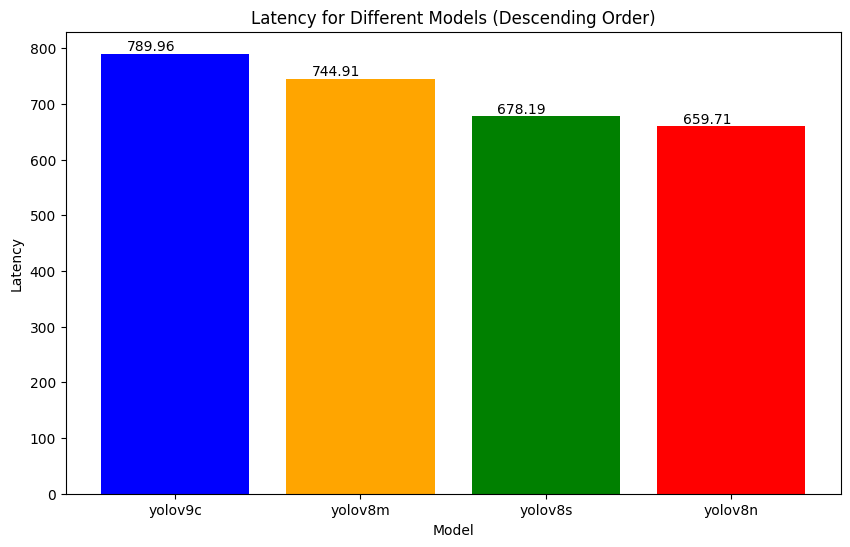

In [150]:
latency = {
    'yolov8n': yolov8n.iloc[0,0],
    'yolov8m': yolov8m.iloc[0,0],
    'yolov8s': yolov8s.iloc[0,0],
    'yolov9c': yolov9c.iloc[0,0],
    # 'rtdetrl': rtdetrl.iloc[0,0]
}

# Sort mean FPS values in descending order
sorted_latency = dict(sorted(latency.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_latency.keys(), sorted_latency.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Latency for Different Models (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Latency')
# Add numbers on the plot
for xi, yi in zip(sorted_latency.keys(), sorted_latency.values()):
    plt.text(xi, yi, f'{yi:.2f}', ha='right', va='bottom')
plt.show()